In [3]:
import pandas as pd

# Load datasets
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')
store = pd.read_csv('../data/store.csv')

# Display basic info
print("Train Data:")
print(train.head(), "\n")

print("Test Data:")
print(test.head(), "\n")

print("Store Data:")
print(store.head())

Train Data:
   Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1   

Test Data:
   Id  Store  DayOfWeek        Date  Open  Promo StateHoliday  SchoolHoliday
0   1      1          4  2015-09-17   1.0      1            0              0
1   2      3          4  2015-09-17   1.0      1            0              0
2   3      7          4  2015-09-17   1.0      1            0              0
3   4      8          4  2015-09-17   1.0      1            0              0
4

C:\Users\shash\AppData\Local\Temp\ipykernel_16056\2054005334.py:4: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('../data/train.csv')


In [4]:
# Merge store data into train and test datasets
train = train.merge(store, how='left', on='Store')
test = test.merge(store, how='left', on='Store')

print("Train Data After Merge:")
print(train.head(), "\n")

print("Test Data After Merge:")
print(test.head())


Train Data After Merge:
   Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday StoreType Assortment  CompetitionDistance  \
0              1         c          a               1270.0   
1              1         a          a                570.0   
2              1         a          a              14130.0   
3              1         c          c                620.0   
4              1         a          a              29910.0   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                        9.0                    2008.0       0

In [5]:
# Convert Date to datetime
train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])

# Extract date-related features
for df in [train, test]:
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['Day'] = df['Date'].dt.day
    df['WeekOfYear'] = df['Date'].dt.isocalendar().week

print("Train Data with Date Features:")
print(train[['Date', 'Year', 'Month', 'Day', 'WeekOfYear']].head())

Train Data with Date Features:
        Date  Year  Month  Day  WeekOfYear
0 2015-07-31  2015      7   31          31
1 2015-07-31  2015      7   31          31
2 2015-07-31  2015      7   31          31
3 2015-07-31  2015      7   31          31
4 2015-07-31  2015      7   31          31


In [6]:
# Check for missing values
print("Missing Values in Train:")
print(train.isnull().sum(), "\n")

print("Missing Values in Test:")
print(test.isnull().sum(), "\n")

# Fill missing values for relevant columns
train['CompetitionDistance'].fillna(train['CompetitionDistance'].median(), inplace=True)
test['CompetitionDistance'].fillna(test['CompetitionDistance'].median(), inplace=True)

# Handle other missing columns as needed (example for CompetitionOpenSince)
for col in ['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear']:
    train[col].fillna(0, inplace=True)
    test[col].fillna(0, inplace=True)

print("Missing Values After Handling:")
print(train.isnull().sum())

Missing Values in Train:
Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
Year                              0
Month                             0
Day                               0
WeekOfYear                        0
dtype: int64 

Missing Values in Test:
Id                               0
Store                            0
DayOfWeek                        0
Date                             0
Open

In [7]:
print(train.columns)

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Year', 'Month', 'Day',
       'WeekOfYear'],
      dtype='object')


In [8]:
# Extract time-based features
train['Year'] = train['Date'].dt.year
train['Month'] = train['Date'].dt.month
train['Day'] = train['Date'].dt.day
train['DayOfWeek'] = train['Date'].dt.dayofweek  # Monday=0, Sunday=6
train['IsWeekend'] = train['DayOfWeek'].isin([5, 6]).astype(int)

test['Year'] = test['Date'].dt.year
test['Month'] = test['Date'].dt.month
test['Day'] = test['Date'].dt.day
test['DayOfWeek'] = test['Date'].dt.dayofweek
test['IsWeekend'] = test['DayOfWeek'].isin([5, 6]).astype(int)

In [9]:
# Sort values by Store and Date
train = train.sort_values(by=['Store', 'Date'])

# Create lag features
for lag in [7, 30]:
    train[f'Sales_lag_{lag}'] = train.groupby('Store')['Sales'].shift(lag)

In [10]:
# Create rolling mean and standard deviation features
train['Sales_rolling_mean_7'] = train.groupby('Store')['Sales'].transform(lambda x: x.rolling(window=7).mean())
train['Sales_rolling_std_30'] = train.groupby('Store')['Sales'].transform(lambda x: x.rolling(window=30).std())

In [11]:
# Calculate the number of months since competition opened
train['CompetitionMonths'] = ((train['Year'] - train['CompetitionOpenSinceYear']) * 12 +
                              (train['Month'] - train['CompetitionOpenSinceMonth']))

test['CompetitionMonths'] = ((test['Year'] - test['CompetitionOpenSinceYear']) * 12 +
                             (test['Month'] - test['CompetitionOpenSinceMonth']))

# Fill negative or missing values with 0
train['CompetitionMonths'] = train['CompetitionMonths'].clip(lower=0).fillna(0)
test['CompetitionMonths'] = test['CompetitionMonths'].clip(lower=0).fillna(0)

In [12]:
train.to_csv('../data/engineered_train.csv', index=False)
test.to_csv('../data/engineered_test.csv', index=False)

In [13]:
#Model training and Evaluation

In [14]:
from sklearn.model_selection import train_test_split

# Drop columns not needed for training
X = train.drop(['Sales', 'Date'], axis=1)
y = train['Sales']

# Split into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Apply encoding
X_train = pd.get_dummies(X_train, columns=['StateHoliday', 'StoreType', 'Assortment', 'PromoInterval'], drop_first=True)
X_valid = pd.get_dummies(X_valid, columns=['StateHoliday', 'StoreType', 'Assortment', 'PromoInterval'], drop_first=True)

# Ensure columns in train and valid are consistent
X_valid = X_valid.reindex(columns=X_train.columns, fill_value=0)

In [16]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Initialize and train the model
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42,enable_categorical=True)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_valid)

# Evaluate the model
rmse = mean_squared_error(y_valid, y_pred, squared=False)
print(f'Validation RMSE: {rmse}')


Validation RMSE: 599.187309856564


In [17]:
import joblib

# Save the model
joblib.dump(model, '../models/sales_forecasting_model.pkl')

['../models/sales_forecasting_model.pkl']

In [18]:
# One-hot encode the test dataset
test_X = pd.get_dummies(test.drop(['Date'], axis=1), columns=['StateHoliday', 'StoreType', 'Assortment', 'PromoInterval'], drop_first=True)

# Align test data columns with training data columns
test_X = test_X.reindex(columns=X_train.columns, fill_value=0)

In [19]:
# Make predictions on test data
# test_X = test.drop(['Date'], axis=1)
test['Predicted_Sales'] = model.predict(test_X)

# Save predictions
test.to_csv('../data/test_predictions.csv', index=False)

<Figure size 1000x800 with 0 Axes>

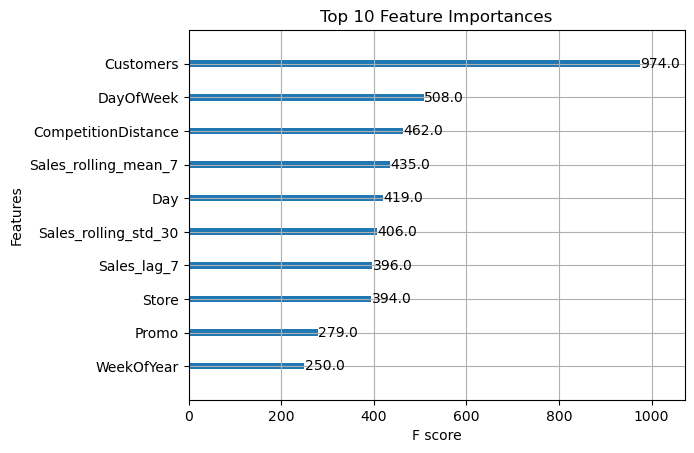

In [20]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

# Plot feature importance
plt.figure(figsize=(10, 8))
plot_importance(model, max_num_features=10, importance_type='weight', title='Top 10 Feature Importances')
plt.show()

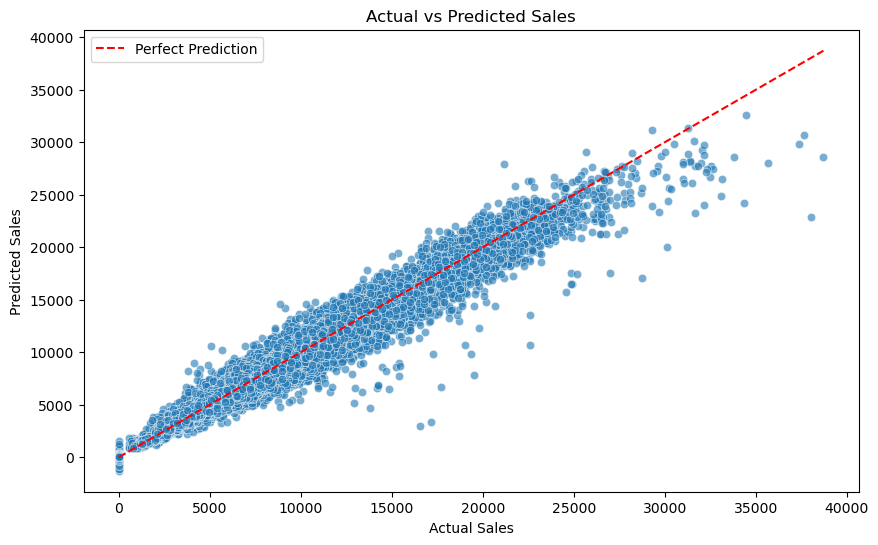

In [21]:
import seaborn as sns

# Create a DataFrame for validation results
validation_results = pd.DataFrame({
    'Actual': y_valid,
    'Predicted': model.predict(X_valid)
})

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', data=validation_results, alpha=0.6)
plt.plot([validation_results['Actual'].min(), validation_results['Actual'].max()],
         [validation_results['Actual'].min(), validation_results['Actual'].max()],
         color='red', linestyle='--', label='Perfect Prediction')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.legend()
plt.show()

In [22]:
import pickle

with open("sales_forecasting_model.pkl", "wb") as f:
    pickle.dump(model, f)

print("Model saved successfully!")


Model saved successfully!
